In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import copy
from populationGraph import populationGraph
from plotFunctions import *

In [2]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 20
numMsg = 200
myseed = 32
maxEpochs = 10000

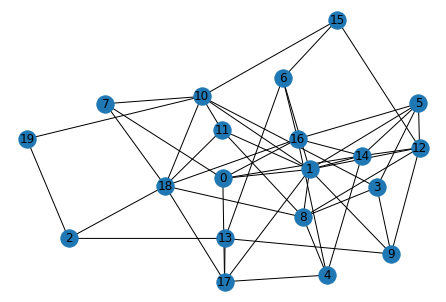

In [3]:
G = nx.erdos_renyi_graph(numNodes, 0.2, seed=myseed)
myPos = nx.spring_layout(G, seed = 40)
nx.draw(G, pos=myPos, with_labels=True)

In [4]:
e = 0
prevStates = []
maxEpochs = 1
common_attrs = {"burnoutThreshold":2*(numMsg*costFactor*msgUtility)/numNodes,"burnoutDrop":2}
network = populationGraph(G,common_attrs,type="Transcendence")
while e<maxEpochs:
    e+=1
    G = network.getGraph()
    msgList = network.createMsgs(numMsg)  #Message list creation
    prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(numNodes)]
    nf, nd = network.transmitMsgs()
    print(network.getNetworkProp("utility"))
    print(nf, nd)
    for i in range(numNodes) : G.nodes[i]['agent'].epochUpdate()
    curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(numNodes)]
    if np.count_nonzero(curStable) == numNodes:
        break
print(e)

[70, 250, 90, 60, 50, 120, 90, 40, 110, 50, 120, 20, 100, 150, 100, 40, 120, 50, 130, 60]
191 9
1


In [5]:
print(G.nodes[0]['agent'].burnoutCount)
print(G.nodes[0]['agent'].burnoutThreshold)

0
20.0


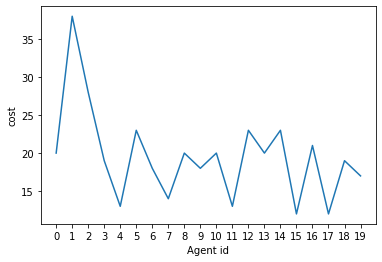

In [6]:
plotAgentwiseProp(G, "cost")

In [7]:
plotAgentwiseProp(G, "virtuePoints", plotMean=True)

Not applicable property


/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  _,_,baseline = plt.stem(range(numNodes), propertyValues, use_line_collection=False)


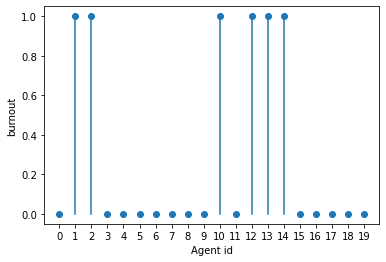

In [8]:
plotAgentwiseProp(G, "burnout", plotType='stem')

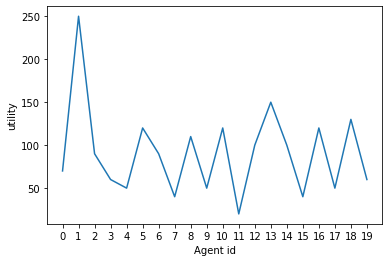

In [9]:
plotAgentwiseProp(G, "utility")